# Final Project: Heart Disease Classification Based Prediction

### Chandra Sekhar Katipalli - GR50572


Data set description:

1. Age | Objective Feature | age | int (days)

2. Height | Objective Feature | height | int (cm) |

3. Weight | Objective Feature | weight | float (kg) |

4. Gender | Objective Feature | gender | categorical code |

5. Systolic blood pressure | Examination Feature | ap_hi | int |

6. Diastolic blood pressure | Examination Feature | ap_lo | int |

7. Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |

8. Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |

9. Smoking | Subjective Feature | smoke | binary |

10. Alcohol intake | Subjective Feature | alco | binary |

11. Physical activity | Subjective Feature | active | binary |

12. Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

The above dataset is obtained from [Kaggle](https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset/data) and the data is collected during medical examination of a paitent.

# <b>1 <span style='color:Red'>|</span> Business Understanding</b>

From this dataset I am going to analyze and clasify the chance of having a heart disease. In this Dataset presence/absence of carido disease is consider as a target value and other columns like Age, Glucose, Blood pressure etc. are considered as dependent columns, based on this assumption we are going to perform Logistic Regression.  


# <b>2 <span style='color:Red'>|</span> Importing Libraries</b>

In [453]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix

### Loading the .csv file into DataFrame


In [454]:
Cardio_df = pd.read_csv('health_data.csv')

# <b>3 <span style='color:Red'>|</span> Dataframe Initial Analysis</b>

In [455]:
Cardio_df.head(5)

,Unnamed: 0,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0.0,18393.0,Female,168.0,62.0,110.0,80.0,normal,normal,False,False,True,False
1,1,1.0,20228.0,Male,156.0,85.0,140.0,90.0,well above normal,normal,False,False,True,True
2,2,2.0,18857.0,Male,165.0,64.0,130.0,70.0,well above normal,normal,False,False,False,True
3,3,3.0,17623.0,Female,169.0,82.0,150.0,100.0,normal,normal,False,False,True,True
4,4,4.0,17474.0,Male,156.0,56.0,100.0,60.0,normal,normal,False,False,False,False


In [456]:
Cardio_df.describe()

,Unnamed: 0,id,age,height,weight,ap_hi,ap_lo
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,34999.500000,49972.419900,19468.865814,164.359229,74.205690,128.817286,96.630414
std,20207.403759,28851.302323,2467.251667,8.210126,14.395757,154.011419,188.472530
min,0.000000,0.000000,10798.000000,55.000000,10.000000,-150.000000,-70.000000
25%,17499.750000,25006.750000,17664.000000,159.000000,65.000000,120.000000,80.000000
50%,34999.500000,50001.500000,19703.000000,165.000000,72.000000,120.000000,80.000000
75%,52499.250000,74889.250000,21327.000000,170.000000,82.000000,140.000000,90.000000
max,69999.000000,99999.000000,23713.000000,250.000000,200.000000,16020.000000,11000.000000


In [457]:
Cardio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   70000 non-null  int64  
 1   id           70000 non-null  float64
 2   age          70000 non-null  float64
 3   gender       70000 non-null  object 
 4   height       70000 non-null  float64
 5   weight       70000 non-null  float64
 6   ap_hi        70000 non-null  float64
 7   ap_lo        70000 non-null  float64
 8   cholesterol  70000 non-null  object 
 9   gluc         70000 non-null  object 
 10  smoke        70000 non-null  bool   
 11  alco         70000 non-null  bool   
 12  active       70000 non-null  bool   
 13  cardio       70000 non-null  bool   
dtypes: bool(4), float64(6), int64(1), object(3)
memory usage: 5.6+ MB


In [458]:
Cardio_df.isnull().sum()

Unnamed: 0     0
id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

# <b>4 <span style='color:Red'>|</span> Data Cleaning</b>

In [459]:
# Droping unwanted column
Cardio_df = Cardio_df.drop(columns='Unnamed: 0')

In [460]:
# Checking unique values and their counts
display(Cardio_df['gender'].value_counts())
display(Cardio_df['cholesterol'].value_counts())
display(Cardio_df['gluc'].value_counts())
display(Cardio_df['smoke'].value_counts())
display(Cardio_df['alco'].value_counts())
display(Cardio_df['active'].value_counts())
display(Cardio_df['cardio'].value_counts())

gender
Male      45530
Female    24470
Name: count, dtype: int64

cholesterol
normal               52385
above normal          9549
well above normal     8066
Name: count, dtype: int64

gluc
normal               59479
well above normal     5331
above normal          5190
Name: count, dtype: int64

smoke
False    63831
True      6169
Name: count, dtype: int64

alco
False    66236
True      3764
Name: count, dtype: int64

active
True     56261
False    13739
Name: count, dtype: int64

cardio
False    35021
True     34979
Name: count, dtype: int64

In [461]:
# Renaming columns names to make more sense
Cardio_df = Cardio_df.rename(columns={'alco':'alcohol', 'cardio':'cardio_Disease', 'gluc':'glucose', 'ap_hi':'BP_high', 'ap_lo':'BP_low'})

Changing catagorical data to numerical data

In [462]:
Cardio_df['cholesterol'] = Cardio_df['cholesterol'].apply(lambda x: 0 if x == 'normal' else 1 if x == 'above normal' else 2)

In [463]:
Cardio_df['glucose'] = Cardio_df['glucose'].apply(lambda x: 0 if x == 'normal' else 1 if x == 'above normal' else 2)

In [464]:
Cardio_df['smoke'] = Cardio_df['smoke'].apply(lambda x: 0 if x == False else 1)

In [465]:
Cardio_df['alcohol'] = Cardio_df['alcohol'].apply(lambda x: 0 if x == False else 1)

In [466]:
Cardio_df['active'] = Cardio_df['active'].apply(lambda x: 0 if x == False else 1)

In [467]:
Cardio_df['cardio_Disease'] = Cardio_df['cardio_Disease'].apply(lambda x: 0 if x == False else 1)

In [468]:
Cardio_df['gender'] = Cardio_df['gender'].apply(lambda x: 0 if x == 'Male' else 1)

In [469]:
Cardio_df['age'] = Cardio_df['age'].apply(lambda x: int(x/365))

In [470]:
# Cleaning Blood pressure by setting min and maximum values
Cardio_df = Cardio_df[(Cardio_df['BP_high'] >= 70) & (Cardio_df['BP_high'] <= 240)]
Cardio_df = Cardio_df[(Cardio_df['BP_low'] >= 40) & (Cardio_df['BP_low'] <= 190)]

In [471]:
# Cleaning Age column for accurate dataset
Cardio_df = Cardio_df[(Cardio_df['weight'] >= 30) & (Cardio_df['weight'] <= 200)]

In [472]:
Cardio_df.describe()

,id,age,gender,height,weight,BP_high,BP_low,cholesterol,glucose,smoke,alcohol,active,cardio_Disease
count,68768.000000,68768.000000,68768.000000,68768.000000,68768.000000,68768.000000,68768.000000,68768.000000,68768.000000,68768.000000,68768.000000,68768.000000,68768.000000
mean,49972.065350,52.828510,0.348723,164.361709,74.126752,126.616537,81.382765,0.364748,0.226006,0.088006,0.053630,0.803368,0.494910
std,28845.355523,6.769046,0.476570,8.183944,14.323737,16.762102,9.675935,0.679017,0.571974,0.283306,0.225287,0.397455,0.499978
min,0.000000,29.000000,0.000000,55.000000,30.000000,70.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24996.750000,48.000000,0.000000,159.000000,65.000000,120.000000,80.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,50014.500000,53.000000,0.000000,165.000000,72.000000,120.000000,80.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,74861.250000,58.000000,1.000000,170.000000,82.000000,140.000000,90.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,64.000000,1.000000,250.000000,200.000000,240.000000,190.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000



# <b>5 <span style='color:Red'>|</span> Exploratory Data Analysis</b>

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


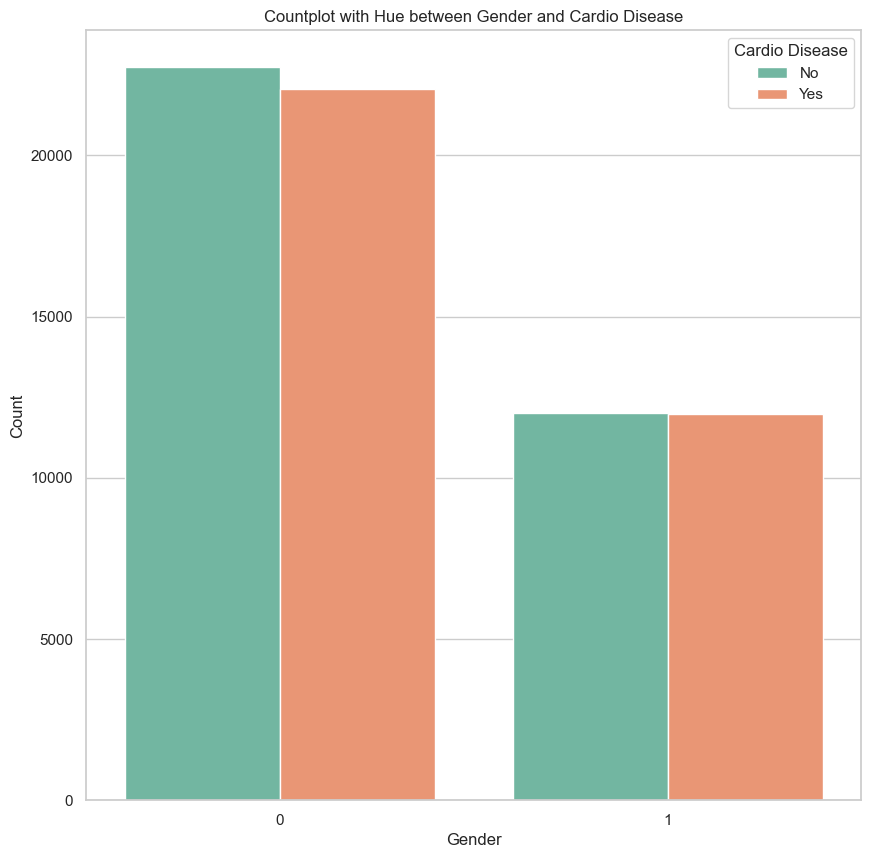

In [473]:
plt.figure(figsize=(10,10))
sns.set_style('whitegrid')
sns.set_palette('Set2')

sns.countplot(data=Cardio_df, x='gender', hue='cardio_Disease', order=[ 0, 1], hue_order=[0, 1])

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Countplot with Hue between Gender and Cardio Disease')
plt.legend(title='Cardio Disease', labels=['No', 'Yes'])
plt.show()

From the above graph its clear that Gender has **no impact** on having **Cardiovascular disease**

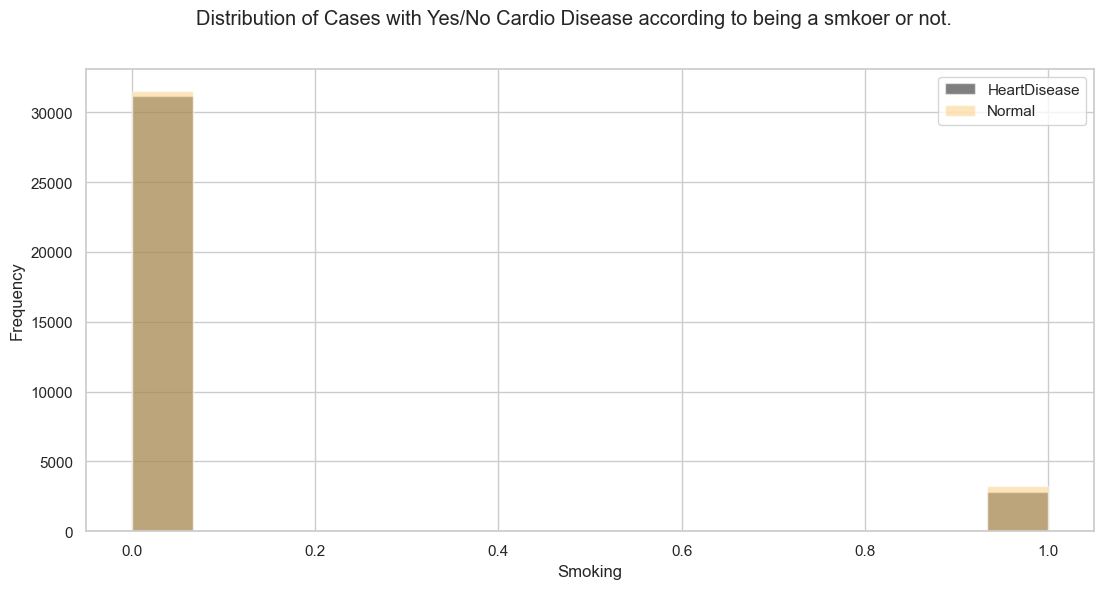

In [474]:
fig, ax = plt.subplots(figsize = (13,6))

ax.hist(Cardio_df[Cardio_df["cardio_Disease"]==1]["smoke"], bins=15, alpha=0.5, color="black", label="HeartDisease")
ax.hist(Cardio_df[Cardio_df["cardio_Disease"]==0]["smoke"], bins=15, alpha=0.5, color="#fccc79", label="Normal")

ax.set_xlabel("Smoking")
ax.set_ylabel("Frequency")

fig.suptitle("Distribution of Cases with Yes/No Cardio Disease according to being a smkoer or not.")

ax.legend();

From above graph we can say that smoking also has **no impact** having **cardiovascular disease**

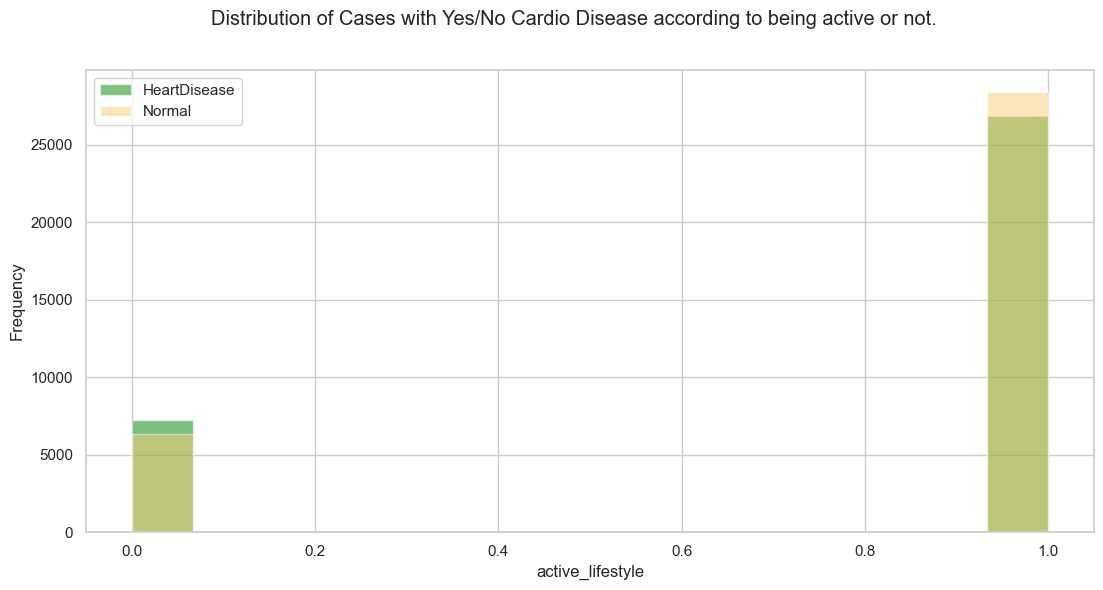

In [475]:
fig, ax = plt.subplots(figsize = (13,6))

ax.hist(Cardio_df[Cardio_df["cardio_Disease"]==1]["active"], bins=15, alpha=0.5, color="green", label="HeartDisease")
ax.hist(Cardio_df[Cardio_df["cardio_Disease"]==0]["active"], bins=15, alpha=0.5, color="#fccc79", label="Normal")

ax.set_xlabel("active_lifestyle")
ax.set_ylabel("Frequency")

fig.suptitle("Distribution of Cases with Yes/No Cardio Disease according to being active or not.")

ax.legend();

From the above graph we can say that having a **active/inactive lifestyle** cannot cause **cardiovascular disease**.

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

<Figure size 1000x1000 with 0 Axes>

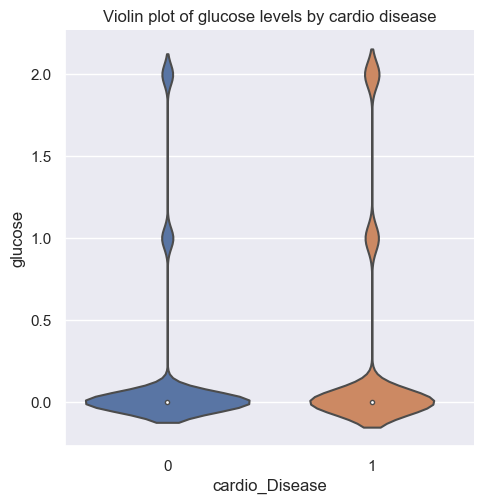

In [476]:
plt.figure(figsize=(10,10))
sns.set()
sns.catplot(data=Cardio_df, x='cardio_Disease', y='glucose', kind='violin')
plt.title('Violin plot of glucose levels by cardio disease')
plt.show()

Clearing having high glucose levels **has chances** of having **cardiovascular disease**. Consider this column as **Dependent**.

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


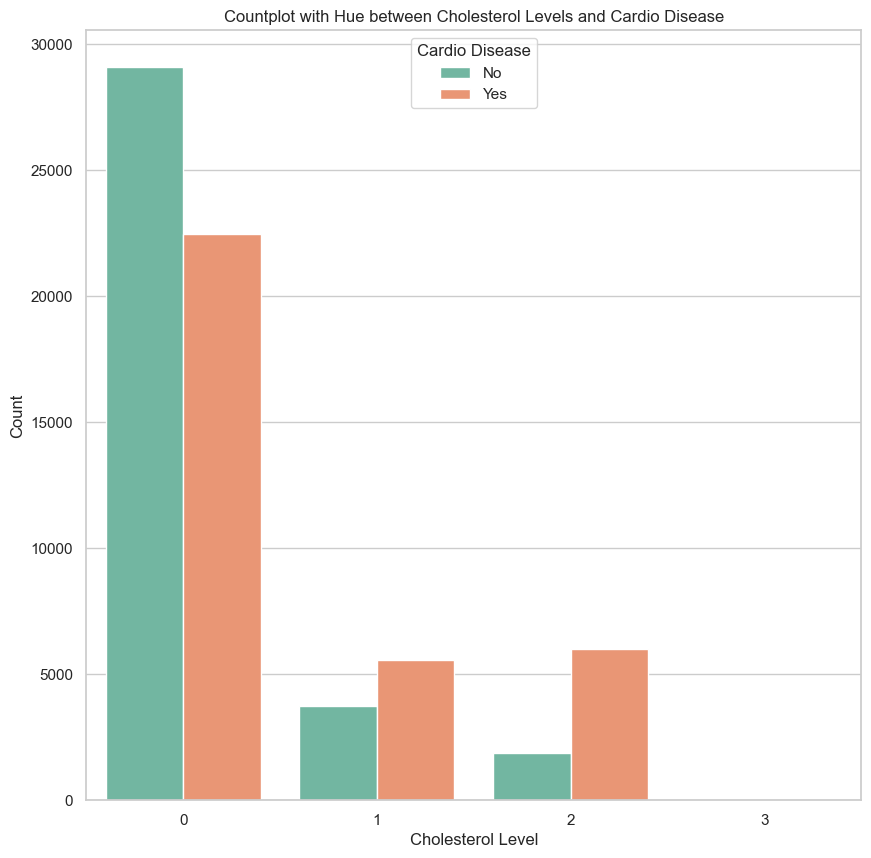

In [477]:
plt.figure(figsize=(10,10))
sns.set_style('whitegrid')
sns.set_palette('Set2')

sns.countplot(data=Cardio_df, x='cholesterol', hue='cardio_Disease', order=[0, 1, 2, 3], hue_order=[0, 1])

plt.xlabel('Cholesterol Level')
plt.ylabel('Count')
plt.title('Countplot with Hue between Cholesterol Levels and Cardio Disease')
plt.legend(title='Cardio Disease', labels=['No', 'Yes'])
plt.show()


Higher cholestrol levels **have more chance** of causing **cardiovascular diseases**. Iam consider cholesterol level as **dependent column**.

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

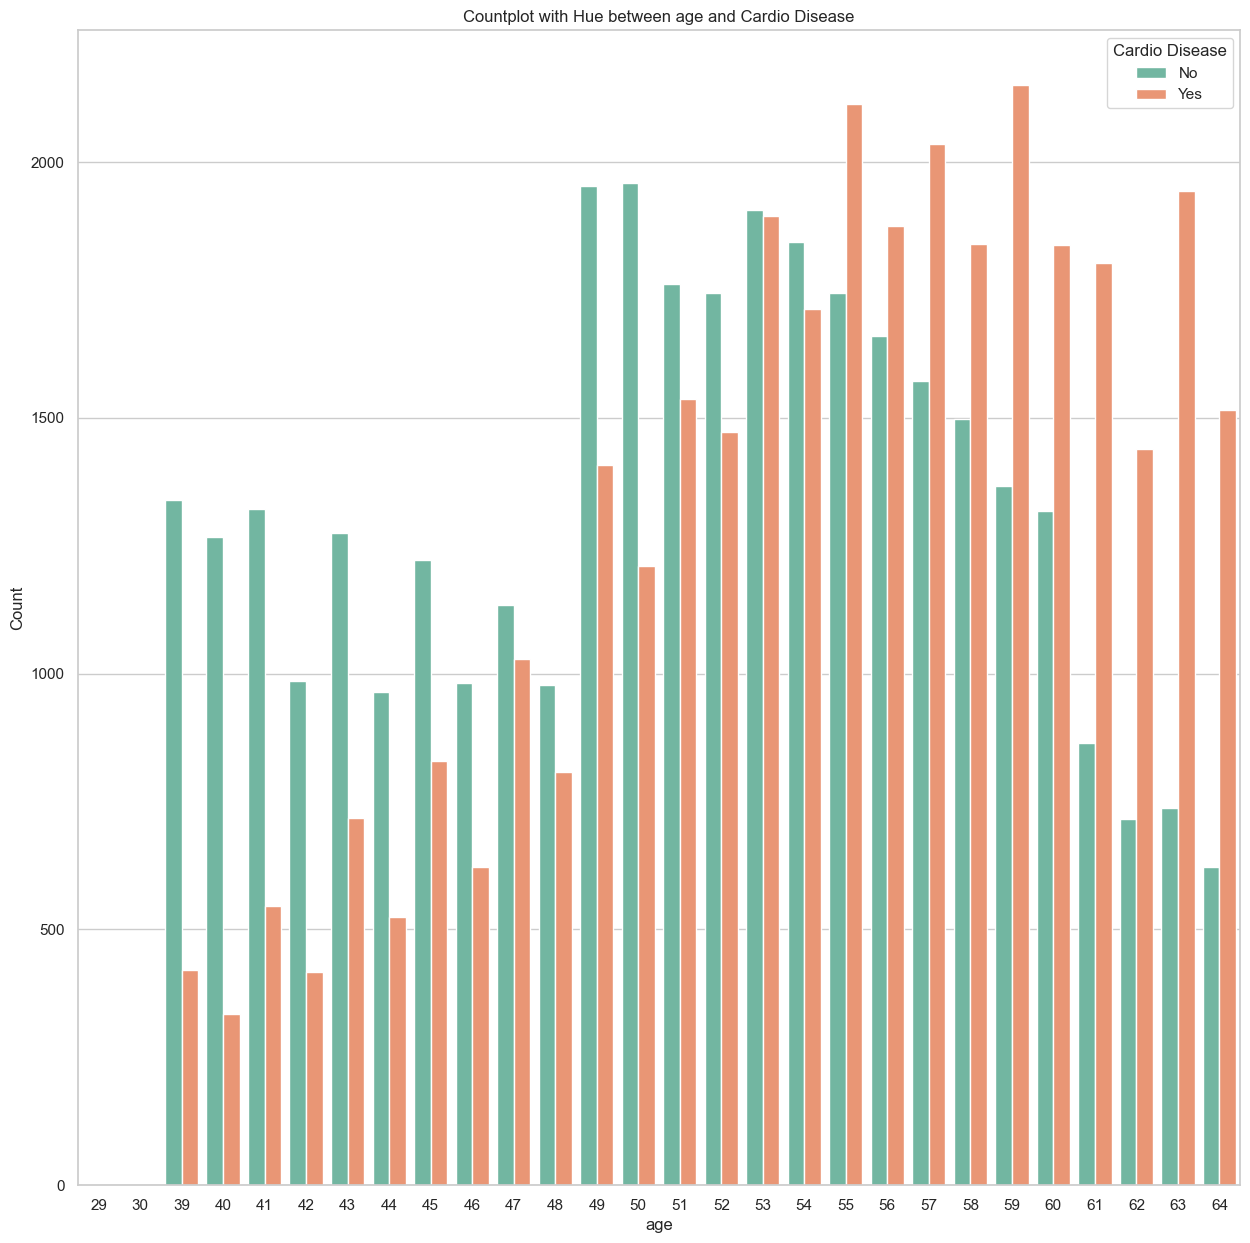

In [478]:
plt.figure(figsize=(15,15))
sns.set_style('whitegrid')
sns.set_palette('Set2')

sns.countplot(data=Cardio_df, x='age', hue='cardio_Disease')

plt.xlabel('age')
plt.ylabel('Count')
plt.title('Countplot with Hue between age and Cardio Disease')
plt.legend(title='Cardio Disease', labels=['No', 'Yes'])
plt.show()


Clearly we can see that as the **age** increases there a **more chance of having a cardiovascular disease**. So, I am considering  as **dependent column**.

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

<Figure size 1000x1000 with 0 Axes>

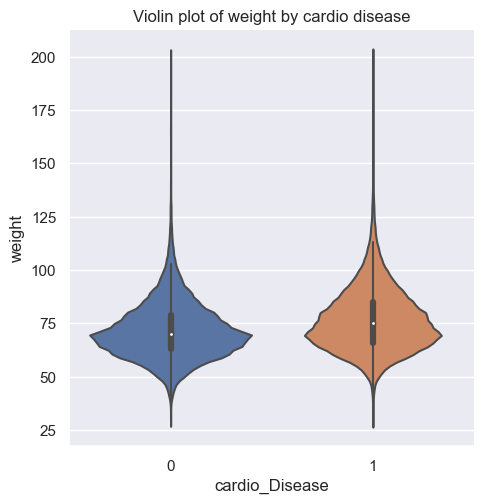

In [479]:
plt.figure(figsize=(10,10))
sns.set()
sns.catplot(data=Cardio_df, x='cardio_Disease', y='weight', kind='violin')
plt.title('Violin plot of weight by cardio disease')
plt.show()

Itseems the **weight** has **an impact** on having **cardiovascular disease**. Considering this as **Dependent**.

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x1000 with 0 Axes>

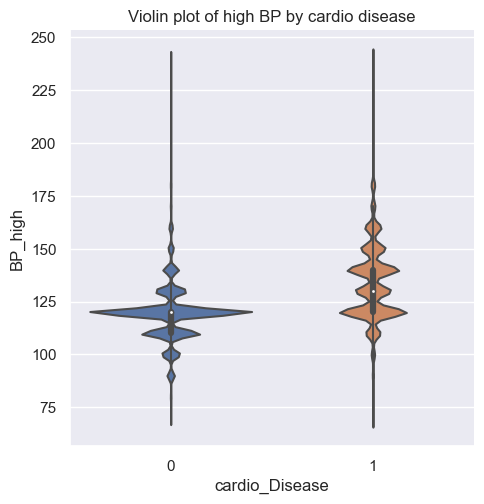

In [480]:
plt.figure(figsize=(10,10))
sns.set()
sns.catplot(data=Cardio_df, x='cardio_Disease', y='BP_high', kind='violin')
plt.title('Violin plot of high BP by cardio disease')
plt.show()

Having **high blood pressure** has **more chances** of having **cardiovascular disease**. cosider this column as **dependent column**.

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x1000 with 0 Axes>

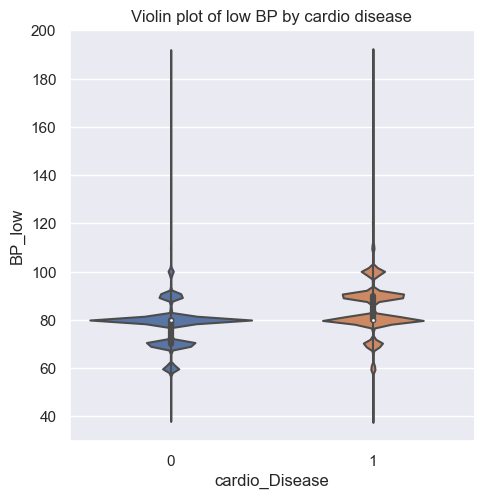

In [481]:
plt.figure(figsize=(10,10))
sns.set()
sns.catplot(data=Cardio_df, x='cardio_Disease', y='BP_low', kind='violin')
plt.title('Violin plot of low BP by cardio disease')
plt.show()

Having **low blood pressure** has a chance of having **cardiovasluar disease**. cosider this column as **dependent column**.

Text(0.5, 1.0, 'corelation between numerical features')

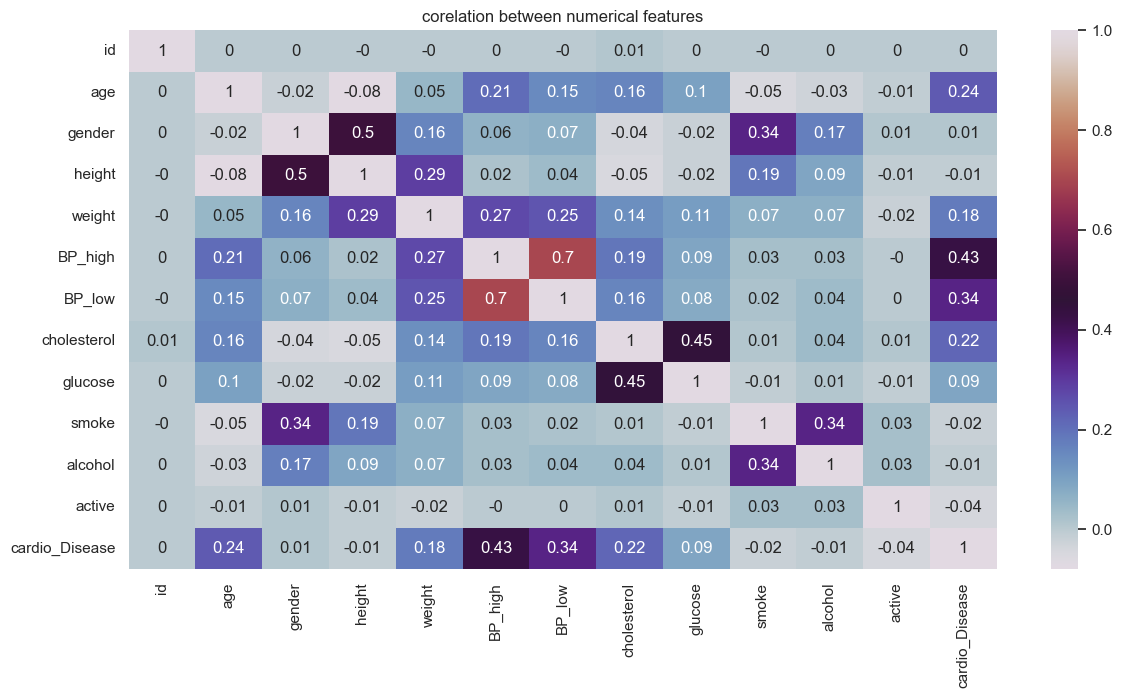

In [482]:
correlation = Cardio_df.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'twilight')
plt.title('corelation between numerical features')

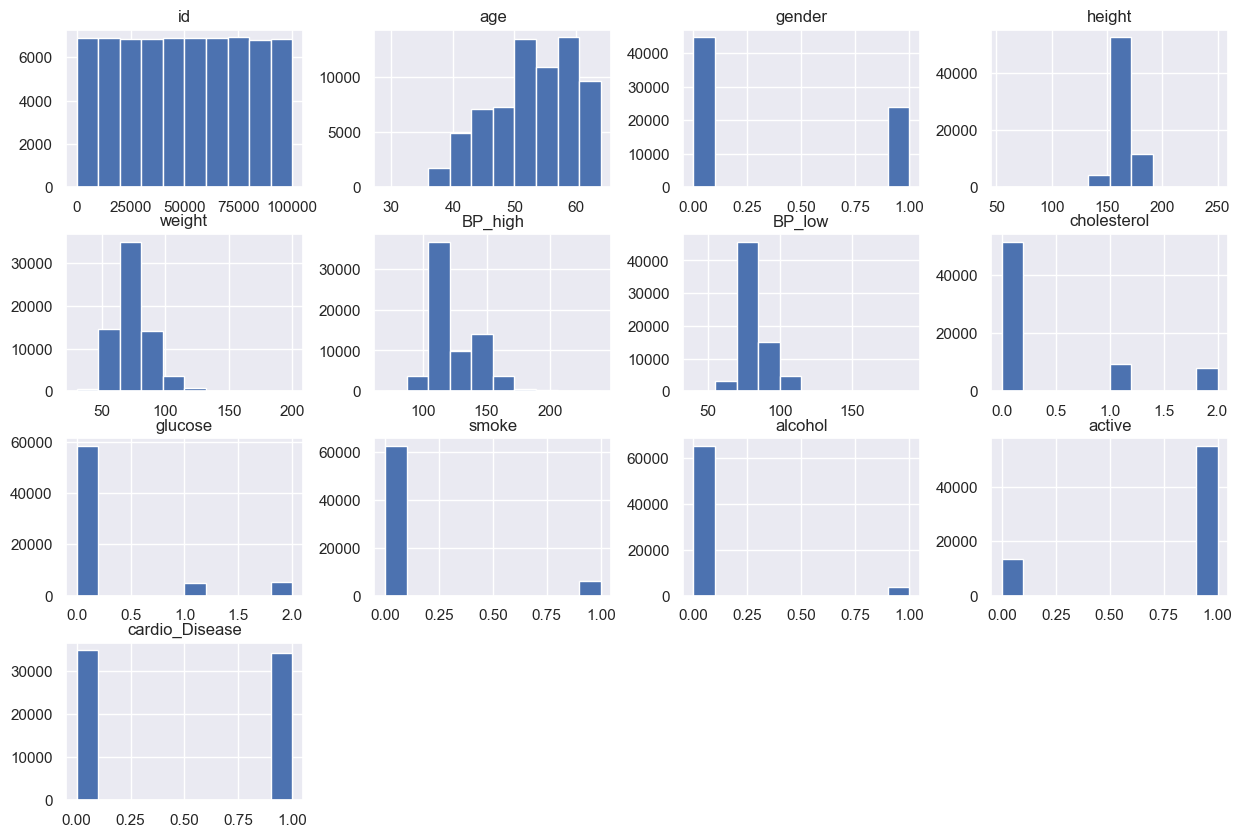

In [483]:
Cardio_df.hist(figsize=(15, 10))
plt.show()

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

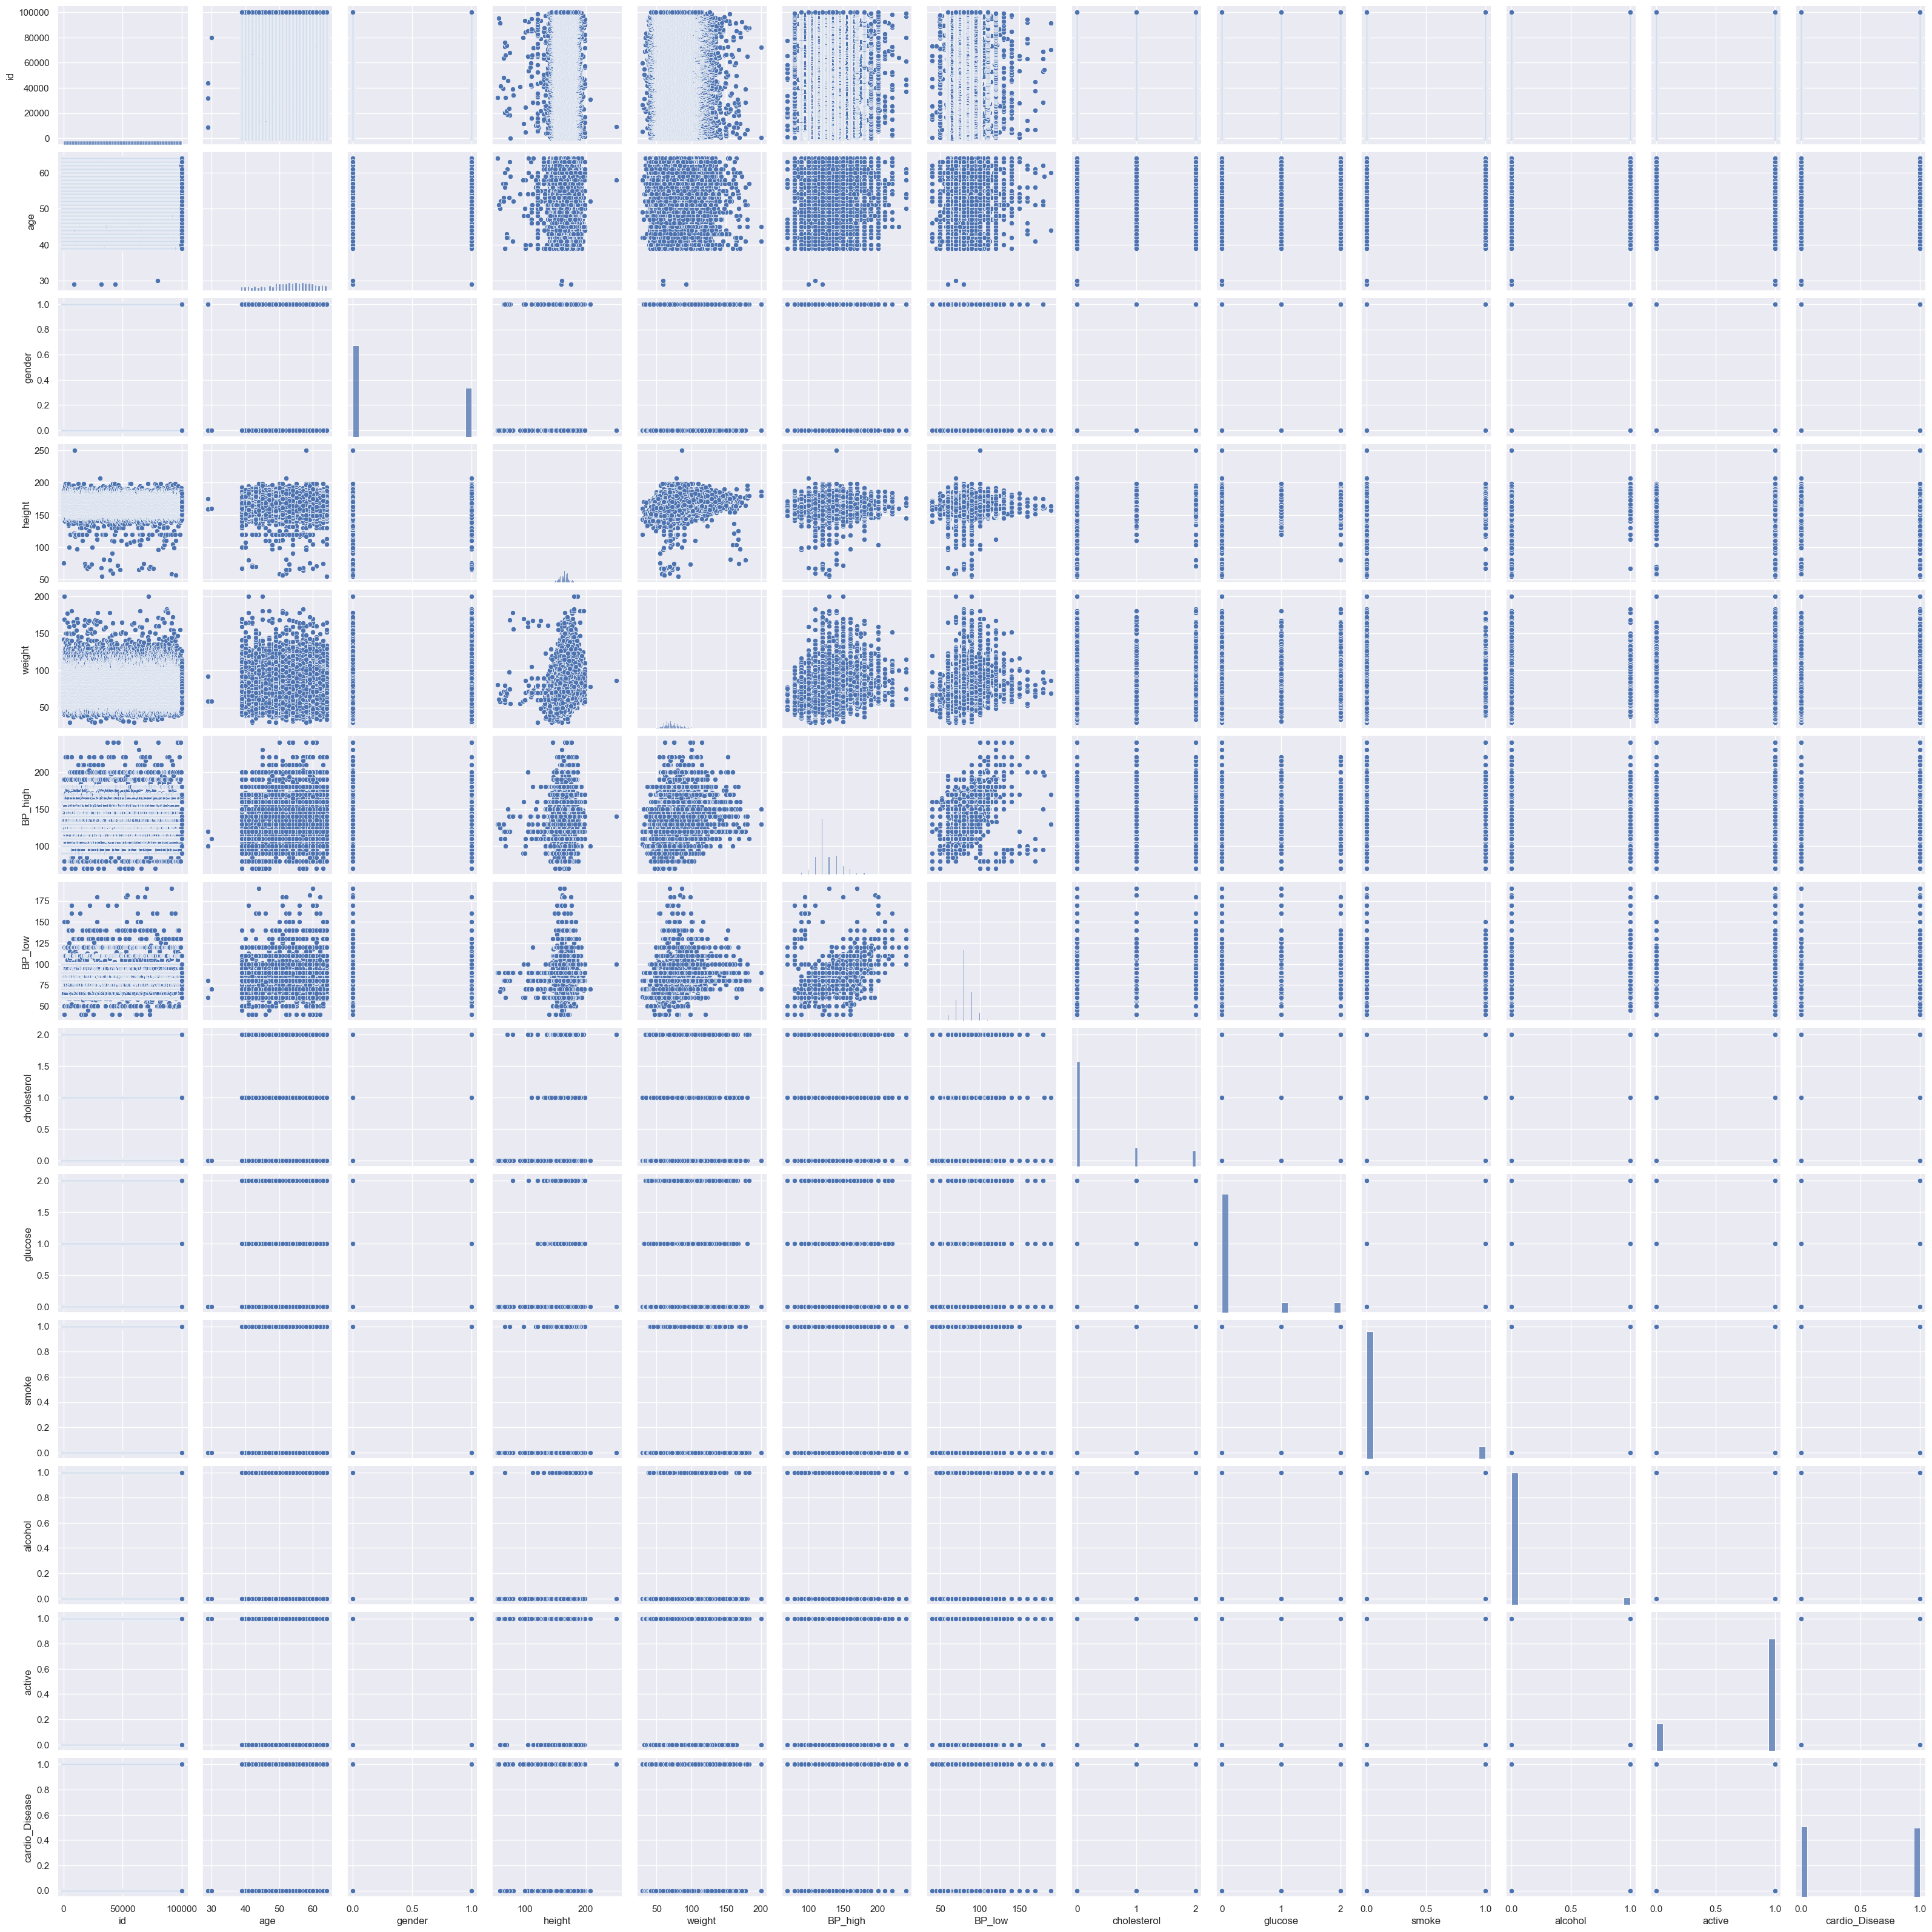

In [485]:
sns.pairplot(Cardio_df)

In [486]:
Cardio_df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'BP_high', 'BP_low',
       'cholesterol', 'glucose', 'smoke', 'alcohol', 'active',
       'cardio_Disease'],
      dtype='object')


# <b>6 <span style='color:Red'>|</span> Data Spliting for Training and Testing</b>

### Creating Dependents and Traget value

In [487]:
X = Cardio_df[['age', 'weight', 'glucose', 'cholesterol', 'BP_high', 'BP_low', 'active']]

y = Cardio_df['cardio_Disease']

In [488]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6)



# <b>7 <span style='color:Red'>|</span> Building a Logistic Regression Model</b>

In [489]:
Log_Reg = LogisticRegression(max_iter = 125)

# Training the Logistic Regression
Log_Reg.fit(X_train, y_train)

LogisticRegression(max_iter=125)

In [490]:
# Predicting the Test Data
y_predicted = Log_Reg.predict(X_test)
y_predicted

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [491]:
# Prediction Probability.
Log_Reg.predict_proba(X_test)

array([[0.69531699, 0.30468301],
       [0.07723192, 0.92276808],
       [0.58796317, 0.41203683],
       ...,
       [0.2032137 , 0.7967863 ],
       [0.31154033, 0.68845967],
       [0.67921012, 0.32078988]])

In [492]:
# Accuracy score
print(f"Accuracy Score: {accuracy_score(y_test,y_predicted)}")

Accuracy Score: 0.726715300162381


In [493]:
cm = confusion_matrix(y_test, y_predicted)
print('confusion_matrix', cm)

confusion_matrix [[16393  4394]
 [ 6882 13592]]


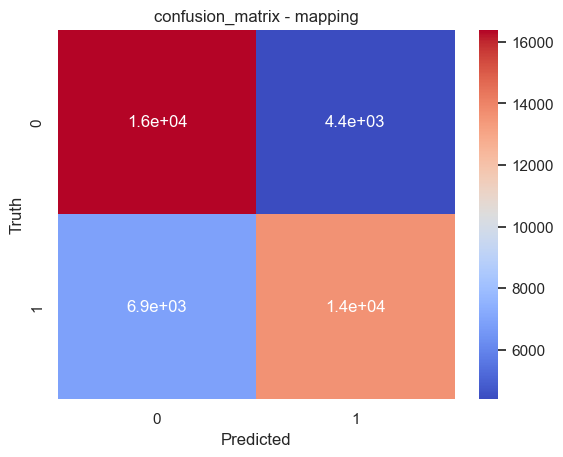

In [494]:
# Mapping the confusion matrix
sns.heatmap(cm, annot=True, cmap='coolwarm')
plt.title('confusion_matrix - mapping')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [495]:
# ROC & AUC Score
print(f"ROC_AUC_Score: {roc_auc_score(y_test,y_predicted, average='macro')}")


ROC_AUC_Score: 0.726242126639299


In [496]:
# Generating a classification report
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test,y_predicted)
print('classification_report')
print(classification_rep)

classification_report
              precision    recall  f1-score   support

           0       0.70      0.79      0.74     20787
           1       0.76      0.66      0.71     20474

    accuracy                           0.73     41261
   macro avg       0.73      0.73      0.73     41261
weighted avg       0.73      0.73      0.73     41261



- The classification problem has two classes: 0 and 1.

- The classifier has an accuracy of 0.72, which means it correctly predicts 72% of the labels.

- For class 0, the classifier has a precision of 0.70, a recall of 0.78, and an f1-score of 0.74.

- For class 1, the classifier has a precision of 0.75, a recall of 0.66, and an f1-score of 0.70.

- The dataset has 20833 instances of class 0 and 20428 instances of class 1.

- The macro average and weighted average of the metrics are both 0.72, which means the classifier performs equally well for both classes.

### **Ploting Recevier Operating Characteristic Curve**

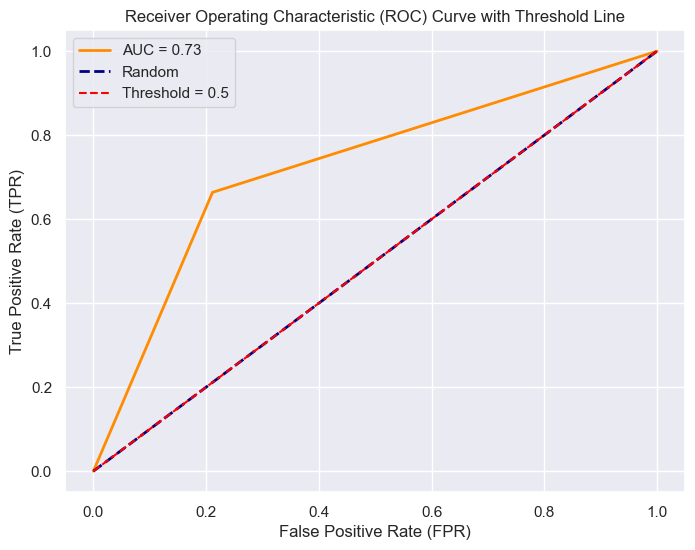

In [497]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_predicted)

# Calculating the Area Under the Curve (AUC)
auc_score = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')

# Adding the threshold line
threshold_value = 0.5 
plt.plot([0, fpr[thresholds <= threshold_value][-1], 1],
         [0, tpr[thresholds <= threshold_value][-1], 1],
         color='red', linestyle='--', label=f'Threshold = {threshold_value}')

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve with Threshold Line')
plt.legend()
plt.show()

### **Ploting Precision-Recall Curve**

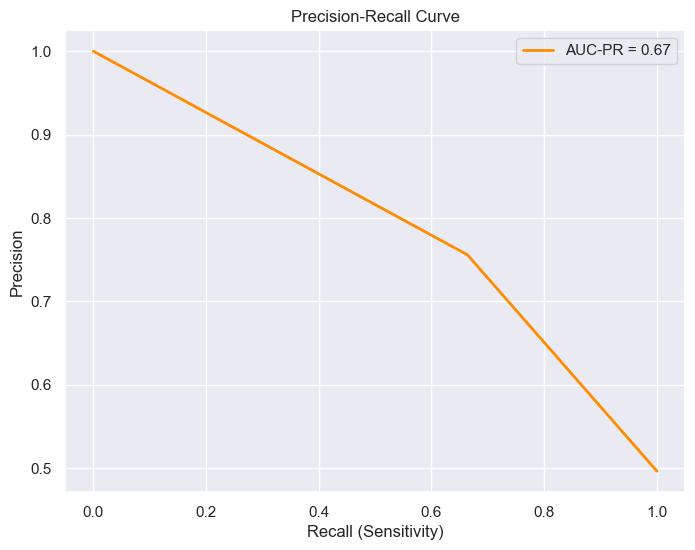

In [498]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, thresholds = precision_recall_curve(y_test, y_predicted)

# Calculating the Area Under the Precision-Recall curve (AUC-PR)
average_precision = average_precision_score(y_test, y_predicted)

# Plotting the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2, label=f'AUC-PR = {average_precision:.2f}')
plt.xlabel('Recall (Sensitivity)')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# <b>8 <span style='color:Red'>|</span> Predicting the final result for an unknown data values</b>

In [499]:
new_data = np.array([[50, 75, 1, 1, 95, 70, 0]])

prediction = Log_Reg.predict(new_data)

# printing the result
if prediction == 1:
    print("The paitent is predicted to have Cardiovascular Disease.")
else:
    print("The paitent is predicted not to have Cardiovascular Disease.")

The paitent is predicted not to have Cardiovascular Disease.


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [500]:
new_data = np.array([[68, 75, 1, 2, 97, 75, 0]])

prediction = Log_Reg.predict(new_data)

if prediction == 1:
    print("The paitent is predicted to have Cardiovascular Disease.")
else:
    print("The paitent is predicted not to have Cardiovascular Disease.")

The paitent is predicted to have Cardiovascular Disease.


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# <b>9 <span style='color:Red'>|</span> Conslusion</b>

- I have built a logistic regression model to predict the probability of cardiac disease from a Dataset obtained for Kaggle with Target value as Cardiovasclar disease.

- Through Expolatory Data Analysis I took seven predictor variables: age, weight, glucose, cholesterol, high blood pressure, low blood pressure, and active.

- Model has an accuracy of 0.72, which means it correctly predicts 72% of the labels in the dataset.

- For the class of no cardiac disease (0), model has a precision of 0.70, a recall of 0.78, and an f1-score of 0.74.

- For the class of cardiac disease (1), model has a precision of 0.75, a recall of 0.66, and an f1-score of 0.70.

- The dataset has 20833 instances of no cardiac disease and 20428 instances of cardiac disease.

- The macro average and weighted average of the metrics are both 0.72, which means model performs equally well for both classes.